# Reading Halo Catalogs

In [1]:
import numpy as np
import json

We can access some of the metadata by reading the JSON files:
some relevants parameters:

```
'L': 1000.0  # box size in units onf Mpc/h
'a_stop': 0.665314958, #scale factor, to get redshift -> z = 1-1/parameter_file['a_stop']

# cosmological parameters
'sigma8': 0.834
'n_s': 0.9624
'Omega_m': 0.3175
'Omega_b': 0.049
'h': 0.6711
'fnl_loc_': 294.45 # fnl local amplitude 
'fnl_equil_': None # fnl equilateral amplitude 

# Particle mass in Msun/h
'pmass': 656509507865.6692
```

In [ ]:
# read some meta data from the simulations
param_path = f'Halo_catalogs/LH_LC300/pmwd_halos_run1.json'
parameter_file = json.load(open(param_path))
parameter_file

{'cosmo': 'LC',
 'root_output': '/home/jcalles/Projects/pmwd/pmwd_halos_final',
 'seed': 15,
 'run': 1,
 'saveData': True,
 'fnl': 294.45,
 'L': 1000.0,
 'npart': 512,
 'a_start': 0.1,
 'a_stop': 0.665314958,
 'a_nbody_maxstep': 0.0282657479,
 'sigma8': 0.834,
 'n_s': 0.9624,
 'Omega_m': 0.3175,
 'Omega_b': 0.049,
 'h': 0.6711,
 'fnl_loc_': 294.45,
 'fnl_equil_': None,
 'b': 0.2,
 'pmass': 656509507865.6692,
 'nmin': 19,
 'Np_min': 50}

In [ ]:
# read the halo catalogue
halo_path = f'Halo_catalogs/LH_LC300/pmwd_halos_run1.npz'
mycat = np.load(halo_path)

redshift = 1-1/parameter_file['a_stop']

# get the properties of the halos
pos_h    = mycat['pos'][:,1:]                        # shape: (3, :); position in real space in Mpc/h
vel_h    = mycat['vel'][:,1:]*100.*(1. + redshift)   # shape: (3, :); peculiar velocities in km/s
masses_h = mycat['mass'][1:]                         # shape: (:,) Halo masses in Msun/h
N_p      = mycat['np_h'][1:]                         # shpae: (:,) Number of particles in the halo

Text(0, 0.5, 'y [Mpc/h]')

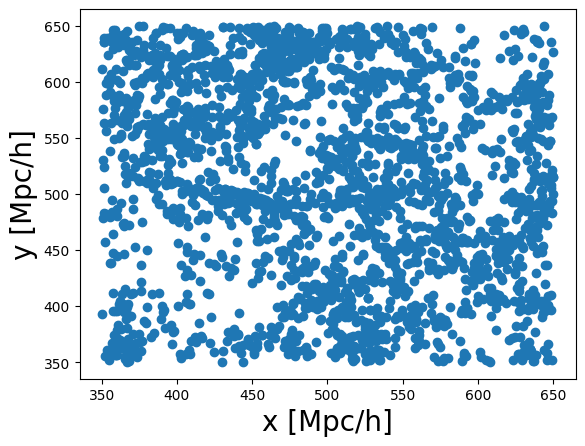

In [4]:
import matplotlib.pyplot as plt

indexes = (
    (pos_h[0, :] >= 350) & (pos_h[0, :] <= 650) &
    (pos_h[1, :] >= 350) & (pos_h[1, :] <= 650) &
    (pos_h[2, :] >= 450) & (pos_h[2, :] <= 550)
)

pos_slice = pos_h[:2,indexes]

plt.scatter(pos_slice[0, :], pos_slice[1, :])

plt.xlabel('x [Mpc/h]', fontsize=20)
plt.ylabel('y [Mpc/h]', fontsize=20)
